In [1]:
#Bibliotecas utilizadas
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math
from scipy import stats
import pandas as pd

## 3. Variáveis Aleatórias

Como já vimos no estudo das probabilidades, o conjunto de todos os possíveis resultados de um experimento aleatório é chamado de **espaço amostral**. Os elementos desse conjunto podem ser numéricos ou não. Por exemplo, a idade de uma pessoa é um exemplo de um conjunto numérico.

Porém, o estado civil de um indivíduo é algo não numérico. Desta forma, em muitas vezes, para podermos trabalhar probabilisticamente com uma variável não numérica, atribuímos valores para cada elemento do espaço amostral. 

O resultado de um experimento de probabilidades generalmente é uma contagem ou uma medida. Quando isso ocorre, o resultado é chamado de **variável aleatória**.

In [2]:
## Lançamento de uma moeda:
espaco_amostral = ['cara', 'coroa']

num_lancamentos = 10000

contador_caras = 0

for i in range(num_lancamentos):
    x = np.random.choice(espaco_amostral)
    if(x == 'cara'):
        contador_caras = contador_caras + 1

probabilidade_caras = contador_caras / num_lancamentos

print("{0: d} dos resultados foram cara, isto é, obtemos uma probabilidade de {1: .2f}".format(contador_caras,probabilidade_caras ))

 5040 dos resultados foram cara, isto é, obtemos uma probabilidade de  0.50


**Definição:** Uma variável aleatória X representa um valor numérico associado a cada resultado de um experimento de probabilidade. A palavra aleatória indica que os valores assumidos por X são obtidos ao acaso.

**Notação:** geralmente, as variáveis aleatórias são representadas por letras maiúsculas (X) enquanto que os valores assumidos por essas variáveis aleatórias são representadas por minúsculas (x). Dessa forma, se escrevermos X=x queremos dizer  que a variável aleatória X assume um valor numérico igual a x.
As variáveis aleatórias podem ser de dois tipos: discretas ou contínuas.



### Variáveis aleatórias discretas

Uma variável aleatória é discreta se ela assume um número finito de valores ou assume um número finito de valores enumeráveis (contáveis). Podemos dizer que uma variável é discreta quando seus valores puderem ser listados.

Por exemplo: o número de vezes que vou na academia durante uma semana pode ser um valor igual a 0, 1, 2, 3, … Assim, definimos a variável aleatória:

- X: número de vezes que vou na academia durante uma semana

Os valores que essa variável pode assumir são x=0, 1, 2, 3, … Dessa forma, se escrevermos X=3 estamos dizendo que “o número de vezes que fui na academia durante a semana (X) é igual a 3 (x)”. 

Exemplo:

1) Lançamento de 2 moedas simultâneas

Espaço amostral: S={ (cara, cara), (cara, coroa), (coroa, coroa), (coroa, cara) }

A variável aleatória X é o número de caras

| Ponto Amostral | X |
|----------------|---|
| (cara, cara)   | 2 |
| (cara, coroa)  | 1 |
| (coroa, cara)  | 1 |
| (coroa, coroa) | 0 |

2) Uma obra possui um registro da quantidade de acidentes diários ocorridos no mês de Abril/2021:

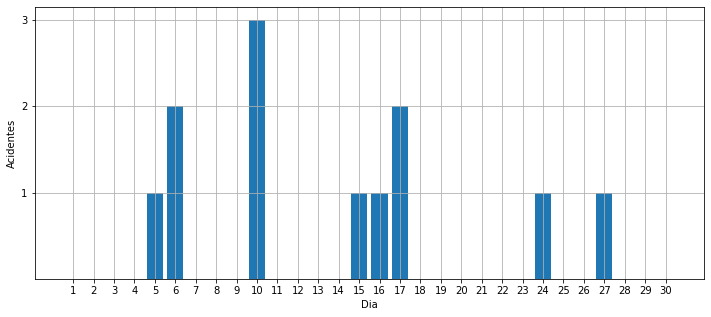

In [3]:
acidentes_por_dia = [0,0,0,0,1,2,0,0,0,3,0,0,0,0,1,1,2,0,0,0,0,0,0,1,0,0,1,0,0,0]
dias = range(1,31)
plt.figure(figsize=(12,5))
plt.bar(dias, acidentes_por_dia)
plt.xticks(dias)
plt.yticks([1,2,3])
plt.xlabel('Dia')
plt.ylabel('Acidentes')
plt.grid()
plt.show()


Com esses dados, podemos construir a sua tabela de frequências.

In [4]:
acidentes = pd.DataFrame(data={'acidentes_por_dia':acidentes_por_dia},index=dias)
freq = acidentes.value_counts()
freq

acidentes_por_dia
0                    22
1                     5
2                     2
3                     1
dtype: int64

Em um dia, a probabilidade de:

* Não ocorrer acidente:

In [5]:
acidentes.head()
freq[0] / freq.sum()


0.7333333333333333

* Ocorrer 1 acidente:

In [6]:
freq[1]/freq.sum()

0.16666666666666666

* Ocorrerem 2 acidentes:

In [7]:
freq[2]/freq.sum()

0.06666666666666667

* Ocorrerem 3 acidentes:

In [8]:
freq[3]/freq.sum()

0.03333333333333333

Outro modo de calcular essas probabilidades:

In [9]:
dist_prob = acidentes.value_counts(normalize=True)
dist_prob

acidentes_por_dia
0                    0.733333
1                    0.166667
2                    0.066667
3                    0.033333
dtype: float64

Essa tabela é denominada **distribuição de probabilidade**
    
| Número de acidentes | Probabilidades |
|---------------------|----------------|
| 0                   | 0.73           |
| 1                   | 0.17           |
| 2                   | 0.07           |
| 3                   | 0.03           |
|                     | **Soma = 1**   |

Relação entre a variável aleatória $X$ (número de acidentes) e os valores da função $P$, que é denominada probabilidade:
  
$$f(x_i) = P(X = x_i)$$
  
A função $P(X = x_i)$ determina a distribuição de probabilidade da variável aleatória $X$.

**Voltando no exemplo das moedas:**

Espaço amostral de 2 moedas S = {(cara, cara), (cara, coroa), (coroa, coroa), (coroa, cara)}

* Qual a probabilidade de não aparecer cara $(x_i = 0)$? 
    - A = [(coroa,coroa)]
    - $p_{A} = 1/4$

* Qual a probabilidade de aparecer uma cara $(x_i = 1)$?
    - B = [(cara, coroa),(coroa, cara)]?
    - $p_{B} = 1/2$

* Qual a probabilidade de aparecerem duas caras $(x_i = 2)$?
    - C = [(cara, cara)]? 
    - $p_{C} = 1/4$

Essa tabela é a distribuição de probabilidade:

| Número de caras  | $$P(X=x_i)$$  |
|------------------|--------------|
| 2                |  1/4         |
| 1                |  2/4=1/2     |
| 0                |  1/4         |
|                  | **soma = 1** |

Represetação gráfica da tabela de distribuição de probabilidade

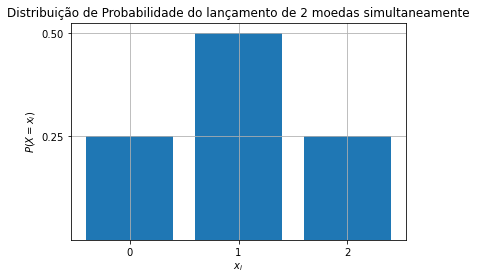

In [10]:
plt.bar(x=[0,1,2], height=[1/4,1/2,1/4])
plt.title('Distribuição de Probabilidade do lançamento de 2 moedas simultaneamente')
plt.ylabel(r'$P(X=x_i)$')
plt.xlabel(r'$x_i$')
plt.xticks([0,1,2])
plt.yticks([1/4,1/2])
plt.grid()
plt.show()

In [11]:
## Exercício: Identificar variáveis discretas no dataset 'weather'

df_weather = pd.read_csv('weather.csv')

df_weather.nunique()


FileNotFoundError: [Errno 2] No such file or directory: 'weather.csv'

Experimento que mostra a distribuição de probabilidade:

https://www.youtube.com/watch?v=Vo9Esp1yaC8

### Variáveis aleatórias contínuas

Uma variável aleatória é contínua se ela possui um número incontável de possíveis resultados. Ou seja, uma variável é dita contínua quando os valores que ela pode assumir poderem ser representados como um intervalo na reta de números reais. Neste caso, os valores assumidos por uma variável contínua não podem ser listados, visto que são infinitos os possíveis valores dessa variável.

Por exemplo: consideremos o tempo que fico na academia em minutos (incluindo frações de minutos). Neste caso, podemos definir uma variável aleatória Y da seguinte forma:

Y: tempo que fico na academia em minutos

Perceba que os valores de Y podem assumir qualquer valor em um intervalo real. Suponhamos, para facilitar, que o tempo máximo que fico na academia seja de 90 minutos. Neste caso, os valores y pertencem ao intervalo [0, 90]


## 3.1 Distribuições de Probabilidade

Uma **distribuição de probabilidade** é uma função que descreve o comportamento aleatório de um fenômeno dependente do acaso.

A distribuição de probabilidade pode **modelar incertezas** e descrever fenômenos físicos, biológicos, econômicos, entre outros.

Para representar a distribuição matematicamente, frequentemente utilizamos a função de probabilidade (variáveis aleatórias discretas) ou [função densidade de probabilidade](https://en.wikipedia.org/wiki/Probability_density_function) (variáveis aleatórias contínuas) . Esta última função é tal que a **probabilidade** da variável aleatória cair em uma faixa particular é dada **pela integral da densidade dessa variável sobre tal faixa** - isto é, é dada pela área abaixo da função densidade mas acima do eixo horizontal e entre o menor e o maior valor dessa faixa.

<img src="https://work.thaslwanter.at/Stats/html/_images/PDF.png" width=400>

Há muitas distribuições de probabilidade diferentes.

Entre as distribuições de probabilidade, a **distribuição normal** tem uma importância particular.

### 3.1.2 Função Distribuição de Probabilidade Acumulada

A Função Distribuição de Probabilidade Acumulada (Cumulative Distribution Function - CDF) é uma função que nos retorna a soma das probabilidades de todos os valores assumidos pela variável aleatória até um certo valor $x_i$. Ela é representada por $P(X \leq x_i)$.

<img src='cdf.png' width=400>

## 3.2 Esperança e variância de uma variável aleatória discreta

Em Estatística, em teoria das probabilidades, o valor esperado, também chamado esperança matemática ou expectância, de uma variável aleatória é a soma do produto de cada probabilidade de saída da experiência pelo seu respectivo valor.


A média, valor esperado ou esperança de uma variável X é dada pela expressão:
$$ [ E(X) = \sum_{i=1}^{k} x_{i} p_{i}]$$

    
Já a Variância é:
$$ Var(X) = \sum_{i=1}^{n}p_i(x_i-\mu)^{2}$$

Uma forma alternativa para calcular a variância, utilizando a Esperança, é:

$$ [ Var(X) = E(X^2) - [E(X)]^2 ]$$

Exemplo:
    
Sabendo que um grupo de amigos compra um cartão de rifa a cada mês e que todo mês são vendidos mil bilhetes do sorteio por 1,00 real cada. Cada bilhete tem uma chance igual de ganhar o prêmio, sendo o primeiro prêmio de 300,00 reais, o segundo de 200,00 reais e o terceiro de 100,00 reais. Qual o ganho líquido potencial ao se comprar um desses bilhetes, ou seja, qual será o valor esperado de X?


|  X | P(X) |
|---|---|
| 300 - 1 = 299  | 1/1000  |
| 200 - 1 = 199  | 1/1000  |
| 100 - 1 = 99  | 1/1000  |
|  0 - 1 = -1 | 997/1000  |

O valor esperado da rifa é:

$$[E(X) = (299 * 0.001) + (199 * 0.001) + (99 * 0.001) + ((-1) * 0.997) = - 0.4 ]$$

Sabendo que:

$$[E(X^2) = (299^2 * 0.001) + (199^2 * 0.001) + (99^2 * 0.001) + ((-1)^2 * 0.997)) = 139.8]$$

A variância da rifa será:

$$[Var(X) = E(X^2) - [E(X)]^2 = 139.8 - (-0.4)^2 = 139.64 ]$$

Calculando o desvio padrão:

$$ Dp(X) = \sqrt{Var(X)} = \sqrt{139.64} \approx 11.82$$

In [12]:
#Calculando a Esperança e a variância

prob = [1/1000, 1/1000, 1/1000, 997/1000]

X = [299, 199, 99, -1]

#Calculando a esperança de X

esperanca = np.sum([i*p for i,p in zip(X,prob)])
print(f'Esperança =  {esperanca}')

Esperança =  -0.4


In [13]:
#Calculando a variância de X
#Primeira maneira    
variancia = np.sum([(p*(i-esperanca)**2) for i,p in zip(X,prob)])

print(f'Var(X) = {variancia}')

Var(X) = 139.64


In [14]:
#Segunda maneira
variancia = 0
ex2 = np.sum([p*(i)**2 for i,p in zip(X,prob)]) #E(X^2)

variancia = ex2 - (esperanca)**2
print(f'Var(X) = {variancia}')

Var(X) = 139.64000000000001


## 3.3 Principais modelos discretos :


#### **3.3.1 Bernoulli** 


Uma **distribuição de Bernoulli** tem apenas dois resultados possíveis, a saber 1 *(sucesso)* e 0 *(falha)*, e uma única tentativa, por exemplo, um sorteio. Portanto, a variável aleatória X que tem uma distribuição de Bernoulli pode assumir o valor 1 com a probabilidade de sucesso, p, e o valor 0 com a probabilidade de falha, q ou 1-p. As probabilidades de sucesso e fracasso não precisam ser igualmente prováveis. 

$$ P(X=x) = p^{x} * (1-p) ^{1-x} $$

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.bernoulli.html


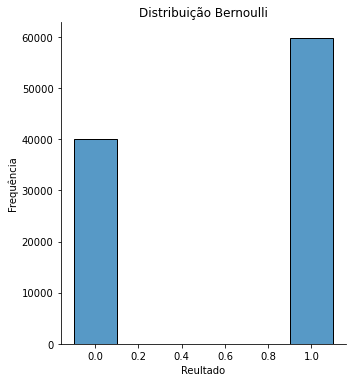

In [15]:
from scipy.stats import bernoulli

X = bernoulli(0.6) #40% falha e 60% de sucesso
X_samples = X.rvs(100000)
ax = sns.displot(X_samples, kind='hist', discrete=True, shrink=0.2)
ax.set(title='Distribuição Bernoulli', xlabel='Reultado', ylabel='Frequência')

#### **3.3.2 Binomial**

Uma distribuição em que apenas dois resultados são possíveis (Ex: sucesso ou fracasso, vitória ou derrota) e em que a probabilidade de sucesso e fracasso é a mesma para todas as tentativas é chamada de Distribuição Binomial. No entanto, os resultados não precisam ser igualmente prováveis e cada estudo é independente um do outro. Os parâmetros de uma distribuição binomial são **n** e **p** onde n é o número total de tentativas e p é a probabilidade de sucesso em cada tentativa. Além do k que é o número de sucesso desejado. Sua função de distribuição de probabilidade é dada por:



$$f(k, n, p)  =  \binom{n}{k} \cdot p^k(1-p)^{n-k}$$

onde,

$$ \binom{n}{k} = \frac{n!}{k!(n-k)!} ]$$

conhecido como **coeficiente binomial**.


- probabilidade de sucesso é p e a probabilidade de insucesso q = 1 - p

https://numpy.org/doc/stable/reference/random/generated/numpy.random.binomial.html

https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.binom.html

Exemplo

Uma companhia perfura 9 poços de exploração para tentar encontrar petróleo, cada um com uma probabilidade estimada de sucesso igual a 0.1. Qual é a probabilidade dos 9 poços falharem (não possuírem petróleo)?

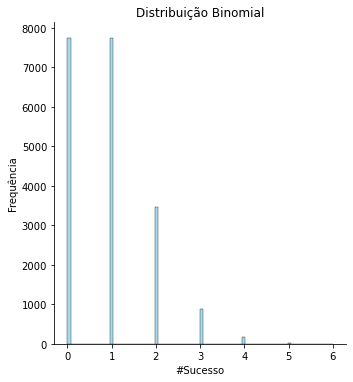

In [16]:
from numpy.random import binomial

data_binom = binomial(n=9, p=0.1, size=20000)

ax = sns.displot(
    data_binom,
    kind='hist',
    color='skyblue',
)
ax.set(title='Distribuição Binomial', xlabel='#Sucesso', ylabel='Frequência')

In [17]:
from scipy.stats import binom

binom.pmf(7,9,0.1) # (k, n, p)

2.916000000000004e-06

**Exercício**: Uma prova de Estatística contém 6 questões, cada um contendo 5 alternativas e apenas uma correta. Qual a probabilidade de alguém, no chute, acertar pelo menos 3 questões?  

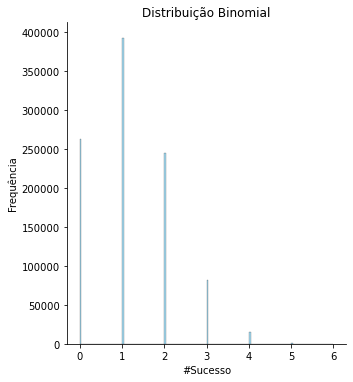

In [18]:
data_binom = np.random.binomial(6,0.2, 1000000)
ax =sns.displot(data_binom, kind = 'hist',color='skyblue')
ax.set(title='Distribuição Binomial', xlabel='#Sucesso', ylabel='Frequência')

In [19]:
(np.sum(data_binom >= 3)/1000000)

0.098691

Utilizando a biblioteca Scipy:

In [20]:
binom.pmf(3,6,0.2) + binom.pmf(4,6,0.2) + binom.pmf(5,6,0.2) + binom.pmf(6,6,0.2)

0.09888000000000001

In [21]:
# Meninos e meninas tem a mesma probabilidade de nascer. Qual a probabilidade de que em 
# uma familia selecionada aleatoriamente de 4 filhos, tenha pelo menos uma menina?

# n = 4
# p = 0.5
# k = {1, 2, 3, 4}

1 - binom.pmf(0,4,0.5)

0.9375

### **3.3.3 Modelo Poisson**

Dizemos que um modelo tem distribuição de Poisson se 

$$ P(X=k) = \frac{e^{-\lambda}\lambda^{k}}{k!} $$
 
onde $\lambda$ é  número esperado de ocorrências que ocorrem num dado intervalo de tempo.

Esse modelo descreve experimentos onde a probabilidade de ocorrência de k eventos em um determinado intervalo de tempo é independente da ocorrência do último evento.

A distribuição de Poisson representa um modelo probabilístico adequado para o estudo de um grande número de fenômenos observáveis. Eis alguns exemplos:

* Chamadas telefônicas por unidade de tempo;
* Defeitos por unidade de área;
* Acidentes por unidade de tempo;
* Chegada de clientes a um supermercado por unidade de tempo;
* Número de glóbulos visíveis ao microscópio por unidade de área;
* Número de partículas emitidas por uma fonte de material radioativo por unidade de tempo.

[Calculadora de Poisson](http://www.elektro-energetika.cz/calculations/po.php?language=portugues)

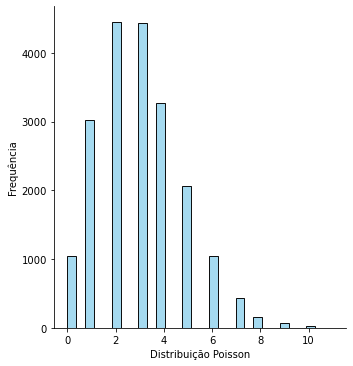

In [24]:
from scipy.stats import poisson
data_poisson = poisson.rvs(mu=3, size=20000)

ax = sns.displot(data_poisson,
                  bins=30,
                  kde=False,
                  color='skyblue',
                  )
ax.set(xlabel='Distribuição Poisson', ylabel='Frequência')

Exercício: O número médio de acidentes por mês, em um certo cruzamento, é três. Qual a probabilidade de, em qualquer mês, ocorrerem quatro acidentes nesse cruzamento?

In [35]:
pd.DataFrame(data_poisson).value_counts(normalize=True)

2     0.22265
3     0.22145
4     0.16380
1     0.15100
5     0.10285
0     0.05225
6     0.05215
7     0.02135
8     0.00800
9     0.00330
10    0.00100
11    0.00020
dtype: float64

In [25]:
def fat(n):
    if n==0 or n==1:
        return 1
    else:
        return n * fat(n-1)

lam = 3
k = 4
p = np.exp(-lam) * lam**k / fat(k) #P(x=4)
print(p)

0.16803135574154082


**Exercício**

Você trabalha em uma empresa de Telemarketing que foi contratada para substituir o atendimento de uma operação de call center. Para poder definir o número de atendentes que serão necessárias para essa operação, é importante ter uma idéia da quantidade de chamadas que esse serviço recebe, mas a única informação que a empresa anterior passou foi que eles recebiam uma média de 510 chamadas por hora. Com base nessa informação e sabendo que a quantidade de chamadas telefônicas por unidade de tempo segue uma distribuição de poisson:

Raciocínio:

* É um evento determinístico?

* Qual é a variável aleatória deste exemplo?

* Existe um modelo de distribuição que modele essa variável aleatória? Qual?

* Para esse modelo, quais são os parâmetros que precisamos para o cálculo de uma probabilidade?

Questões:
- a) Qual a probabilidade dessa operação receber  12 chamadas em um minuto?
- b) Qual é a probabilidade dessa operação receber no máximo 10 chamadas em um minuto?
- c) Qual é a probabilidade dessa operação receber mais do que 13 chamadas em um minuto?

In [36]:
'''Resposta'''
#A
from scipy.stats import poisson
lamb = 8.5
k = 12
poisson.pmf(k=k,mu=lamb)

0.060420880284544225

In [37]:
#B
poisson.cdf(k=10,mu=lamb)

0.7633619791340178

In [38]:
#C
1 - poisson.cdf(k=13, mu=lamb)

0.051411114111327816

### 3.3.4 Uniforme

A distribuição uniforme discreta é uma distribuição de probabilidade simétrica em que um número finito de valores é igualmente provável de ser observado; cada um dos n valores tem a mesma probabilidade 1/n.

**Exemplo**

No lançamento de um dado, a variável aleatória X pode tomar os valores 1,2,3,4,5,6

Como cada um desdes valores está associada uma só probabilidade de realização e $\sum P(x_i)=1$, a função probabilidade resulta da distribuição de probabilidade:


| X | P(X) |
|---|------|
| 1 | 1/6  |
| 2 | 1/6  |
| 3 | 1/6  |
| 4 | 1/6  |
| 5 | 1/6  |
| 6 | 1/6  |

<BarContainer object of 6 artists>

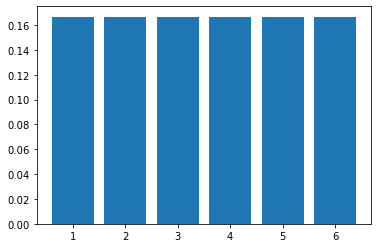

In [39]:
plt.bar(x=[1, 2, 3, 4, 5, 6], height=1/6)

DOC Scipy: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.uniform.html

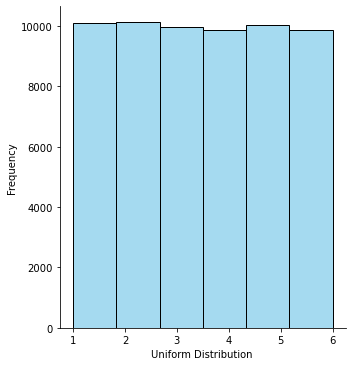

In [42]:
from scipy.stats import uniform
# random numbers from uniform distribution
n = 60000
start = 1
width = 5
data_uniform = uniform.rvs(size=n, loc = start, scale=width)

ax = sns.displot(data_uniform,
                  bins=6,
                  color='skyblue',
                  )
ax.set(xlabel='Uniform Distribution ', ylabel='Frequency')

**Diversas distribuições de probabilidade**

http://ucla.jamesyxu.com/wp-content/uploads/2011/08/A-probability-and-statistics-cheatsheet.pdf

## 3.4 Principais modelos contínuos :

### 3.4.1 Uniforme

Uma variável aleatória contínua X tem distribuição uniforme com parâmetros a e b (com a<b) se sua função de densidade de probabilidade é dada por:

$$[f(x) = \frac{1}{b-a} ]$$

Se $a \leq x \leq b$, então $f(x) = \frac{1}{b-a}$. Caso $x$ não pertença ao intervalo entre a e b, então $f(x) = 0$.


<center><img src=https://media.geeksforgeeks.org/wp-content/uploads/probability-distribution-1.jpg width="200" height="500" />

Esperança (média): $$ E(X) = \frac{a+b}{2}$$

Variância: $$Var(X) = \frac{(b-a)^2}{12}$$

Função acumulada: 
$$ 
F(x) = P(X < x) = 
  \begin{cases}
      0, & x<a \\
      \frac{x-a}{b-a}, & a \le x \leq b \\
      1, & x > b
  \end{cases}
$$

## 3.4.2 Distribuição Normal

É representada por uma **curva simétrica em torno do seu ponto médio**, apresentando assim seu famoso formato de **sino** (bell shape).

A curva de distribuição normal representa o comportamento de **diversos processos e fenômenos comuns**, como por exemplo: altura ou peso de uma população, a pressão sanguínea de um grupo de pessoas, o tempo que um grupo de estudantes gasta para realizar uma prova, etc.

A distribuição normal serve também como base para a inferência estatística clássica, sendo a premissa em diversos modelos e métodos.

Na distribuição normal, a média, mediana e moda dos dados possuem o mesmo valor. 

<img src="https://dietassessmentprimer.cancer.gov/images/learn/distribution1.jpg">

Usaremos a notação X ~ N($\mu$,$\sigma^2$) para representar uma variável aleatória **com distribuição normal** de média $\mu$ e variância $\sigma^2$.

<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/74/Normal_Distribution_PDF.svg/1280px-Normal_Distribution_PDF.svg.png" width=500>

A equação da distribuição normal é:

<img src="https://www.onlinemathlearning.com/image-files/normal-distribution-formula.png" width=200>



Em resumo, a distribuição normal (distribuição teórica da variável aleatória contínua):
- formato em sino
- simétrica em torno do x (média), ou seja, a média, moda e mediana estão no mesmo ponto
- a curva normal ou curva de Gauss
- Área sob a curva é igual a 1
- assintótica nas abcissas, ou seja, aproxima do eixo mas não toca


Na distribuição normal, os dados são distribuídos de forma muito particular, tal que o **desvio padrão** determina a proporção de dados em cada faixa:

<img src="https://miro.medium.com/max/24000/1*IdGgdrY_n_9_YfkaCh-dag.png" width=500>

<img src="https://miro.medium.com/max/24000/1*IZ2II2HYKeoMrdLU5jW6Dw.png" width=500>

**Exemplo:** 

Dado que $X \sim N(10,100)$, calcule:

a) $P(X = 15)$

In [43]:
from scipy.stats import norm

norm.pdf(15,loc=10, scale=10)

0.03520653267642995

b) $P(X \leq 20)$

In [44]:
norm.cdf(20,loc=10,scale=10)

0.8413447460685429

c) Plote a distribuição

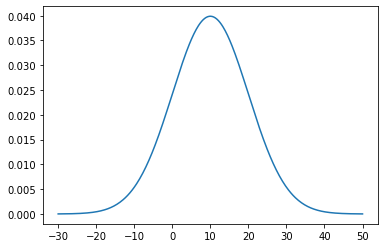

In [45]:
x = np.linspace(-30, 50, 400)

mu = 10 #média
sigma = 10 #desvio padrão

# usando o scipy
y = norm(loc=mu, scale=sigma).pdf(x) #probability density function (pdf)

plt.plot(x, y)

plt.show()

### Z-Score

O **z-score** de uma observação nada mais é que **o número de desvios padrões que a obervação está com relação à média**:

$$ z = \frac{x - \mu}{\sigma} $$

$$ z \sigma = x - \mu $$

$$  x = \mu + z \sigma  $$

Como vimos acima, em uma distribuição normal, 99.73% das observações são esperadas de estar entre 3 desvios-padrão da média. Assim, obervações para além desta faixa são muito improváveis de ocorrer (0.27% de chance), de forma que podem ser consideradas outliers.

Assim, é comum considerar outliers os pontos tais que $|z| > 3$ (embora seja comum também variar este z-score limite, para 2.5 o, 3.5, etc.)

**OBS.: naturalmente, este método é altamente dependente da hipótese de que seus dados são normalmente distribuídos! Por isso, funciona apenas aproximadamente para outros casos. Mas é uma boa aproximação, em geral.**

Exemplo:

Suponha que as medidas da corrente elétrica em pedaço de fio sigam a
distribuição Normal, com uma média de 10 miliamperes e uma variância de 4
miliamperes. Qual a probabilidade de a medida exceder 13 miliamperes?


Como, $z = \frac{13 - 10}{2} = 1,5$. Assim,
$$P(X > 13) = P(z > 1,5)$$
$$=1-P(z \leq 1,5)$$
Da tabela, temos
$$P(z \leq 1,5) = 0.9332$$
Assim,

$$P(X > 13)=1-0.9332=0.0668$$

Utilizar o Z-Score é o mesmo que utilizar uma distribuição normal de média 0 e desvio padrão igual a 1. Logo, podemos calcular $P(z \leq 1,5)$ utilizando a CDF de uma distribuição Normal com esses parâmetros. Assim, o resultado seria:

In [ ]:
rv = norm()

1 - rv.cdf(1.5)

0.06680720126885809

Exercício

Para o problema anterior, calcule a probabilidade da medida ser menor ou igual a 11 mA.

Tabela de Distribuição Normal Padrão (https://zscoregeek.com/using-z-score-table/)

<img src="https://zscoregeek.com/wp-content/uploads/2021/09/positive-z-score-table-493x1024.png" width=500>
     
     

Diversas distribuições de probabilidade

http://ucla.jamesyxu.com/wp-content/uploads/2011/08/A-probability-and-statistics-cheatsheet.pdf